<a href="https://colab.research.google.com/github/Davidgr11/Computational_Intelligence_AI_DataMining/blob/main/ArtificialNeuralNetworkRecurrent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
from matplotlib import pyplot
import numpy

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
datos=pandas.read_csv('airline-passengers.csv')
datos.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


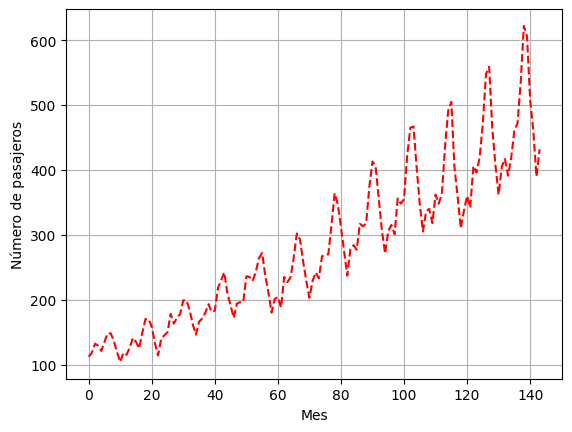

In [ ]:
pyplot.plot(datos['Passengers'],'r--')
pyplot.xlabel("Mes")
pyplot.ylabel('Número de pasajeros')
pyplot.grid()
pyplot.show()

In [ ]:
datos=datos[['Passengers']]
datos.head(5)

,Passengers
0,112
1,118
2,132
3,129
4,121


In [ ]:
escalador=MinMaxScaler()
datos2=escalador.fit_transform(datos.to_numpy())
datos2

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [ ]:
datos2=pandas.DataFrame(datos2,columns=['y'])
datos2.head(5)

,y
0,0.015444
1,0.027027
2,0.054054
3,0.048263
4,0.032819


In [ ]:
datos2['X']=datos2['y'].shift(1)
datos2

,y,X
0,0.015444,NaN
1,0.027027,0.015444
2,0.054054,0.027027
3,0.048263,0.054054
4,0.032819,0.048263
...,...,...
139,0.969112,1.000000
140,0.779923,0.969112
141,0.689189,0.779923
142,0.552124,0.689189


In [ ]:
datos2=datos2.dropna()
datos2

,y,X
1,0.027027,0.015444
2,0.054054,0.027027
3,0.048263,0.054054
4,0.032819,0.048263
5,0.059846,0.032819
...,...,...
139,0.969112,1.000000
140,0.779923,0.969112
141,0.689189,0.779923
142,0.552124,0.689189


In [ ]:
X=datos2['X'].to_numpy()
X.shape

(143,)

In [ ]:
#LSTM (Registros, pasos de tiempo, características)
X=numpy.reshape(X,(X.shape[0],1,1))
X.shape

(143, 1, 1)

In [ ]:
y=datos2['y'].to_numpy()
y.shape

(143,)

In [ ]:
red=Sequential()
red.add(LSTM(3,input_shape=(1,1)))
red.add(Dense(1))
red.compile(loss="mean_squared_error",
            optimizer='adam')
red

In [ ]:
red.fit(X,y,epochs=100,batch_size=1)

Epoch 1/100
143/143 [==============================] - 3s 3ms/step - loss: 0.1636
Epoch 2/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0838
Epoch 3/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 4/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 5/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0436
Epoch 6/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0396
Epoch 7/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0357
Epoch 8/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 9/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0279
Epoch 10/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 11/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 12/100
143/143 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 13/100


In [ ]:
pred=red.predict(X)
pred

5/5 [==============================] - 1s 3ms/step


array([[0.03000911],
       [0.0394451 ],
       [0.06221189],
       [0.05724717],
       [0.04423653],
       [0.06722227],
       [0.08944391],
       [0.08944391],
       [0.06890242],
       [0.04103684],
       [0.01773906],
       [0.0394451 ],
       [0.03470244],
       [0.05232885],
       [0.07737722],
       [0.06722227],
       [0.05069982],
       [0.09118645],
       [0.12879252],
       [0.12879252],
       [0.10707241],
       [0.06387697],
       [0.03313248],
       [0.07567248],
       [0.08424412],
       [0.0929336 ],
       [0.14358866],
       [0.11605031],
       [0.13246882],
       [0.14358866],
       [0.18348196],
       [0.18348196],
       [0.15483885],
       [0.11424631],
       [0.08597273],
       [0.12148706],
       [0.13062873],
       [0.14732462],
       [0.1719411 ],
       [0.14919795],
       [0.15295511],
       [0.22065857],
       [0.24454042],
       [0.26864952],
       [0.20293868],
       [0.1681182 ],
       [0.13246882],
       [0.173

In [ ]:
pred=escalador.inverse_transform(pred)
pred

array([[119.54472],
       [124.43256],
       [136.22577],
       [133.65402],
       [126.91452],
       [138.82114],
       [150.33195],
       [150.33195],
       [139.69145],
       [125.25708],
       [113.18883],
       [124.43256],
       [121.97586],
       [131.10634],
       [144.0814 ],
       [138.82114],
       [130.26251],
       [151.23459],
       [170.71452],
       [170.71452],
       [159.4635 ],
       [137.08827],
       [121.16262],
       [143.19833],
       [147.63846],
       [152.1396 ],
       [178.37892],
       [164.11406],
       [172.61885],
       [178.37892],
       [199.04366],
       [199.04366],
       [184.20653],
       [163.17958],
       [148.53387],
       [166.93028],
       [171.66568],
       [180.31415],
       [193.06549],
       [181.28455],
       [183.23074],
       [218.30113],
       [230.67194],
       [243.16045],
       [209.12224],
       [191.08524],
       [172.61885],
       [194.058  ],
       [196.04771],
       [196.04771],


In [ ]:
yor=escalador.inverse_transform([y])
yor

array([[118., 132., 129., 121., 135., 148., 148., 136., 119., 104., 118.,
        115., 126., 141., 135., 125., 149., 170., 170., 158., 133., 114.,
        140., 145., 150., 178., 163., 172., 178., 199., 199., 184., 162.,
        146., 166., 171., 180., 193., 181., 183., 218., 230., 242., 209.,
        191., 172., 194., 196., 196., 236., 235., 229., 243., 264., 272.,
        237., 211., 180., 201., 204., 188., 235., 227., 234., 264., 302.,
        293., 259., 229., 203., 229., 242., 233., 267., 269., 270., 315.,
        364., 347., 312., 274., 237., 278., 284., 277., 317., 313., 318.,
        374., 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
        355., 422., 465., 467., 404., 347., 305., 336., 340., 318., 362.,
        348., 363., 435., 491., 505., 404., 359., 310., 337., 360., 342.,
        406., 396., 420., 472., 548., 559., 463., 407., 362., 405., 417.,
        391., 419., 461., 472., 535., 622., 606., 508., 461., 390., 432.]])

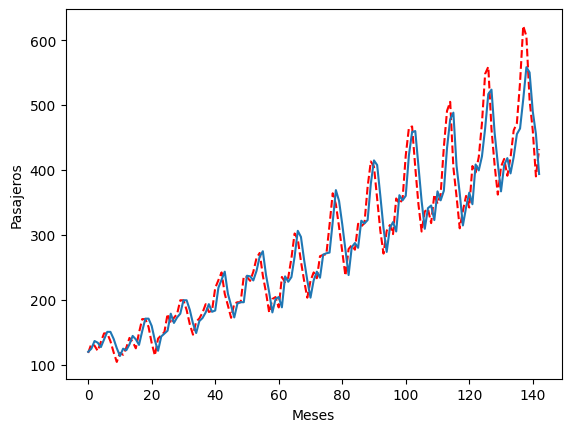

In [ ]:
pyplot.plot(yor[0],'r--')
pyplot.plot(pred)
pyplot.xlabel('Meses')
pyplot.ylabel("Pasajeros")
pyplot.show()